In [1]:
import tensorflow as tf
import PIL
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from subprocess import call
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from decimal import Decimal, localcontext

from pathlib import Path




def opF(path):
    p = Path(path)
    
    # different methods depending on windows or mac (comment out the one you don't need)
    
    os.startfile(p) # for Windows
    # _ = call(['open',p]) # for Mac/Linux

In [2]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [3]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=True, 
  pooling='avg'
)

ryoanJi_Path = "Resources/ryoanJiPhoto.jpg"
opF(ryoanJi_Path)

ryoanJi_image = load_image(ryoanJi_Path)
featureRyoanJi = model.predict(ryoanJi_image)[0]

1/1 [==============================] - 1s 530ms/step


In [163]:
featureRyoanJi.size

1000

In [164]:
featureRyoanJi

array([1.04296316e-06, 2.98049667e-06, 3.17817467e-05, 2.11710972e-06,
       1.46640696e-05, 3.06466318e-05, 3.23162749e-05, 9.56010917e-05,
       1.02589111e-04, 1.54555151e-02, 3.48001886e-05, 2.40770669e-06,
       9.65198051e-05, 3.90304479e-07, 1.26180146e-06, 4.29370208e-04,
       4.50026528e-06, 3.87599272e-07, 1.24025269e-06, 1.79490939e-06,
       1.33139918e-06, 2.36303094e-05, 2.19165158e-04, 2.80511333e-04,
       1.05257124e-04, 7.95930828e-05, 5.85873458e-05, 5.53284772e-05,
       8.92424305e-06, 2.86066152e-05, 2.78905383e-03, 4.16200965e-06,
       7.67500512e-03, 1.15914876e-03, 8.43325222e-04, 5.11519145e-04,
       7.63795990e-03, 3.19438434e-04, 5.22480441e-05, 1.19026680e-03,
       2.80581958e-06, 5.39619243e-04, 2.32690712e-04, 1.09272485e-03,
       6.94516581e-04, 4.38968278e-03, 1.14823861e-05, 2.13320789e-04,
       4.67842008e-04, 5.22388853e-02, 1.54244617e-01, 6.15563113e-05,
       1.01859659e-04, 8.27476106e-06, 1.15406718e-02, 1.02451213e-05,
      

In [165]:
sankeiEn = "Resources/SankeiEnPhoto.jpg"
opF(sankeiEn)
sankeiEn_image = load_image(sankeiEn)
featureSankeiEn = model.predict(sankeiEn_image)[0]

englishGarden = "Resources/englishGardenPhoto.jpg"
opF(englishGarden)
englishGarden_image = load_image(englishGarden)
featureEnglishGarden = model.predict(englishGarden_image)[0]

1/1 [==============================] - 0s 28ms/step


In [166]:
np.linalg.norm(featureRyoanJi - featureSankeiEn)

0.5379154

In [167]:
np.linalg.norm(featureRyoanJi - featureEnglishGarden)

1.0367805

In [168]:
np.linalg.norm(featureSankeiEn - featureEnglishGarden)

1.0861267

In [169]:
# begin

In [170]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

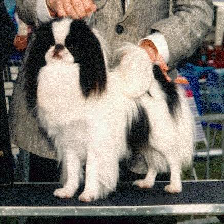

In [171]:
dog_image_id = os.listdir('Images/dog')[0]
dog_path = os.path.join('Images/dog',dog_image_id)
dog_image = load_image(dog_path)

tf.keras.preprocessing.image.load_img(dog_path, target_size=(224,224))

In [172]:
print(f'shape: {dog_image.shape}')
print(f'type: {type(dog_image)}')

shape: (1, 224, 224, 3)
type: <class 'numpy.ndarray'>


In [173]:
model.predict(dog_image)

1/1 [==============================] - 0s 251ms/step


array([[6.35055670e-08, 4.21090334e-07, 2.38759554e-07, 3.58520680e-09,
        2.06165698e-08, 6.24795220e-08, 1.28643607e-09, 1.16043284e-05,
        5.08459743e-05, 7.00482246e-07, 7.60910694e-08, 3.74674471e-07,
        2.08015738e-09, 3.98985911e-08, 7.68462840e-08, 9.17330354e-08,
        5.60249021e-07, 6.30550119e-08, 2.43333920e-06, 3.35830407e-07,
        2.47357917e-07, 1.66787413e-05, 1.80333482e-05, 1.21581084e-04,
        2.13128419e-06, 2.81080652e-08, 1.01135726e-07, 5.79837227e-08,
        2.25898997e-08, 2.17645520e-05, 6.11861273e-09, 9.32160162e-08,
        3.53473837e-08, 5.65378855e-08, 2.24788699e-09, 9.37533429e-08,
        1.70327024e-08, 5.82666226e-09, 7.90394949e-07, 1.74529845e-07,
        3.67001052e-09, 1.95048990e-08, 4.28681579e-09, 7.56382974e-08,
        7.13248696e-08, 7.93564595e-06, 3.66992658e-09, 5.55985302e-08,
        7.62972530e-09, 1.08194364e-07, 4.69127173e-07, 3.85135791e-05,
        1.48618199e-07, 4.60661731e-08, 9.67317004e-10, 8.049977

In [174]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [175]:
dog_image = load_image(dog_path)
f = model.predict(dog_image)

1/1 [==============================] - 0s 237ms/step


In [176]:
print(f)

[[0.37237957 0.         0.3161851  ... 0.15015042 0.40728387 2.392902  ]]


In [177]:
x = Dropout(rate=0.4)(model.output)
# This determines the number of outputs, and thus the number of categories, in my test case 2: dog or cat
x = Dense(4)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [178]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [179]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [180]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    'Images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    'Images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 1017 images belonging to 4 classes.
Found 111 images belonging to 4 classes.


In [181]:
batch_size = 32

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    # this needs to be much higher than 1, but for demo here we'll keep it at this
    epochs=2,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/2
31/31 [==============================] - 42s 1s/step - loss: 1.1160 - val_loss: 0.3226
Epoch 2/2
31/31 [==============================] - 39s 1s/step - loss: 0.4044 - val_loss: 0.2105


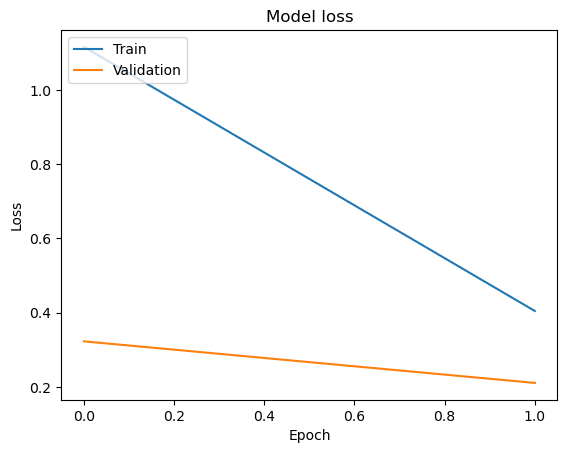

In [182]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [183]:
random_cat = random.choice(os.listdir('Images/cat'))
cat_path = os.path.join('Images/cat',random_cat)
cat = load_image(cat_path)
random_dog = random.choice(os.listdir('Images/dog'))
dog_path = os.path.join('Images/dog',random_dog)
dog = load_image(dog_path)

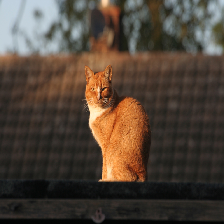

In [184]:
tf.keras.preprocessing.image.load_img(cat_path, target_size=(224,224))

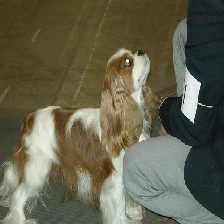

In [185]:
tf.keras.preprocessing.image.load_img(dog_path, target_size=(224,224))

In [186]:
print(f'''cat:{np.round(model.predict(cat),2)}''')

1/1 [==============================] - 0s 238ms/step
cat:[[0.56 0.14 0.02 0.29]]


In [195]:
print(f'''dog:{np.round(model.predict(dog),3)}''')

1/1 [==============================] - 0s 26ms/step
dog:[[0.034 0.002 0.964 0.001]]


In [189]:
fox_path = 'Images/red-fox-in-winter.jpg'
fox = load_image(fox_path)

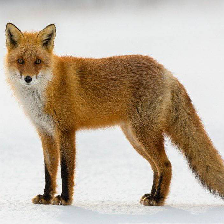

In [190]:
tf.keras.preprocessing.image.load_img(fox_path, target_size=(224,224))

In [196]:
print(f'''fox:{np.round(model.predict(fox),3)}''')

1/1 [==============================] - 0s 25ms/step
fox:[[0.009 0.002 0.001 0.988]]


In [192]:
xin_path = 'Images/123.jpg'
xin = load_image(xin_path)

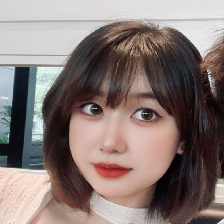

In [193]:
tf.keras.preprocessing.image.load_img(xin_path, target_size=(224,224))

In [197]:
print(f'''xin:{np.round(model.predict(xin),2)}''')

1/1 [==============================] - 0s 26ms/step
xin:[[0.85 0.01 0.12 0.02]]


In [198]:
gua_path = 'Images/321.jpg'
gua = load_image(gua_path)

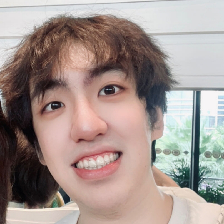

In [199]:
tf.keras.preprocessing.image.load_img(gua_path, target_size=(224,224))

In [200]:
print(f'''gua:{np.round(model.predict(gua),2)}''')

1/1 [==============================] - 0s 26ms/step
gua:[[0.89 0.01 0.09 0.01]]


In [201]:
doge_path = 'Images/66.jpg'
doge = load_image(doge_path)

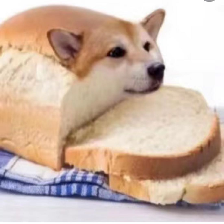

In [202]:
tf.keras.preprocessing.image.load_img(doge_path, target_size=(224,224))

In [203]:
print(f'''gua:{np.round(model.predict(doge),2)}''')

1/1 [==============================] - 0s 27ms/step
gua:[[0.13 0.03 0.67 0.17]]
